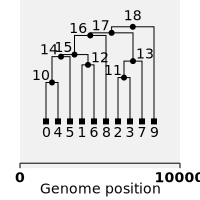

In [37]:
import msprime
from IPython.display import SVG, display
demography = msprime.Demography()
demography.add_population(name="A", initial_size=10000, growth_rate=0.05)

    # Simulate an ancestral history for 3 diploid samples under the coalescent
    # with recombination on a 5kb region with human-like parameters.
ts_observed = msprime.sim_ancestry(
    samples=10,
    ploidy=1,
    recombination_rate=0,
    sequence_length=10_000,
    demography=demography)
# Visualise the simulated ancestral history.
SVG(ts.draw_svg())

In [8]:
import matplotlib.pyplot as plt
import numpy as np

mu, sigma = 0.5, 0.1
s = np.random.normal(mu, sigma, 1)
print(s)

[0.48656599]


In [38]:
#ts = msprime.sim_ancestry(5, ploidy=1, sequence_length=1000)
mts_observed = msprime.sim_mutations(ts_observed, rate=1e-5)


print(mts.num_mutations)
#SVG(mts.draw_svg())




170


In [16]:

for var in mts.variants():
    print(var.site.position, var.alleles, var.genotypes, sep="\t")

279.0	('T', 'C')	[0 0 0 0 0 0 0 0 1 0]
350.0	('G', 'A')	[0 0 0 0 0 1 0 0 0 0]
362.0	('C', 'G')	[0 0 0 0 0 0 0 0 0 1]
591.0	('G', 'T')	[0 0 0 0 0 0 1 0 0 0]
610.0	('A', 'C')	[1 0 0 0 0 0 0 0 0 0]
687.0	('G', 'C')	[0 1 1 1 1 0 0 0 1 0]
709.0	('G', 'T')	[0 0 0 0 0 1 0 0 0 0]
1047.0	('C', 'T')	[0 0 0 0 0 0 1 0 0 0]
1053.0	('C', 'A')	[0 0 0 0 0 1 0 0 0 0]
1230.0	('T', 'G')	[1 0 0 0 0 0 0 0 0 0]
1254.0	('C', 'A')	[0 0 1 0 0 0 0 0 0 0]
1308.0	('C', 'G')	[0 0 0 1 0 0 0 0 0 0]
1353.0	('G', 'T')	[1 0 0 0 0 0 1 1 0 0]
1468.0	('G', 'A')	[0 0 0 0 0 1 0 0 0 0]
1615.0	('G', 'C')	[1 0 0 0 0 0 1 1 0 0]
1695.0	('A', 'G')	[0 0 0 0 0 0 0 1 0 0]
1920.0	('T', 'G')	[0 1 0 0 1 0 0 0 0 0]
1925.0	('T', 'G')	[0 0 0 0 0 0 0 0 0 1]
2060.0	('T', 'C')	[0 1 0 0 0 0 0 0 0 0]
2079.0	('A', 'G')	[0 0 1 1 0 0 0 0 0 0]
2244.0	('T', 'A')	[0 1 0 0 1 0 0 0 0 0]
2602.0	('G', 'C')	[0 0 0 0 0 0 1 0 0 0]
2696.0	('G', 'T')	[0 0 0 0 0 0 1 0 0 0]
2806.0	('C', 'T')	[0 0 0 0 0 0 1 0 0 0]
2837.0	('A', 'G')	[0 1 0 0 0 0 0 0 0 0]
2855.0	

In [39]:
observed_statistics = [float(mts.Tajimas_D()), mts.num_mutations, mts.get_pairwise_diversity()]
observed_statistics

[-1.6612906362700288, 170, 39.82222222222224]

In [53]:
import numpy as np
num_replicates = 10000
sim_stats = []
mi = np.random.uniform(1e-8, 1e-4, num_replicates)
alpha = np.random.uniform(0, 0.2, num_replicates)

for i in range(num_replicates):
    if i % 1000 == 0:
        print(i)
    demography = msprime.Demography()
    demography.add_population(name="A", initial_size=10000, growth_rate=alpha[i])
    # Simulate an ancestral history for 3 diploid samples under the coalescent
    # with recombination on a 5kb region with human-like parameters.
    ts = msprime.sim_ancestry(
        samples=10,
        ploidy=1,
        recombination_rate=0,
        sequence_length=10_000,
        demography=demography)
    
    mts = msprime.sim_mutations(ts, rate=mi[i])
    snps = mts.num_mutations
    D = float(mts.Tajimas_D())
    pi = mts.get_pairwise_diversity()
    sim_stats.append([D,snps,pi])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [66]:
observed_statistics_np = np.array(observed_statistics) 
allDifs = []
goodIndexes = []
for i in range(num_replicates):
    d = np.linalg.norm(observed_statistics_np - np.array(sim_stats[i]))
    allDifs.append(d)
    if( d < 50):
        goodIndexes.append(i)

##for i in range(num_replicates):
##    simstats = np.array(sim_stats[i])
    
allDifs
len(goodIndexes)


1755

In [69]:
miEstimate = 0 
alphaEstimate = 0
for i in range(len(goodIndexes)):
    miEstimate = miEstimate + mi[goodIndexes[i]]
    alphaEstimate = alphaEstimate + alpha[goodIndexes[i]]

miEstimate = miEstimate / len(goodIndexes)
alphaEstimate = alphaEstimate/len(goodIndexes)

print(miEstimate, alphaEstimate)



3.96882771516347e-05 0.12969601871310718


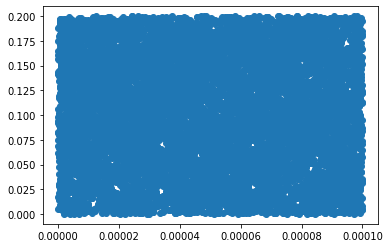

In [75]:
import matplotlib.pyplot as plt

goodalpha = []
goodmi = []
for i in range(len(goodIndexes)):
    goodalpha.append(alpha[goodIndexes[i]])
    goodmi.append(mi[goodIndexes[i]])


plt.scatter(mi,alpha)


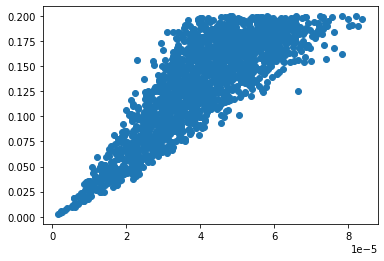

In [74]:

plt.scatter(goodmi, goodalpha)